In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 1. Cargar dataset
df = pd.read_csv('fashion-mnist_test.csv')
X = df.drop('label', axis=1).values / 255.0  # Normalizar
y = df['label'].values

2025-07-14 12:56:29.929355: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 12:56:29.936639: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 12:56:29.960869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752519389.998827   22751 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752519390.009317   22751 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752519390.038758   22751 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# 2. Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear el modelo
def crear_modelo(n_neuronas=128, tasa_aprendizaje=0.001, activacion='relu'):
    modelo = keras.models.Sequential([
        keras.layers.Dense(n_neuronas, activation=activacion, input_shape=(784,)),
        keras.layers.Dense(64, activation=activacion),
        keras.layers.Dense(10, activation='softmax')
    ])
    optimizador = keras.optimizers.Adam(learning_rate=tasa_aprendizaje)
    modelo.compile(optimizer=optimizador,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
    return modelo


In [3]:
# 4. Entrenar varios modelos con diferentes parámetros
resultados = []
parametros = [
    (64, 0.001, 'relu'),
    (128, 0.001, 'relu'),
    (128, 0.005, 'relu'),
    (256, 0.001, 'tanh'),
    (128, 0.0005, 'relu')
]

for n, lr, act in parametros:
    print(f"Entrenando con neuronas={n}, lr={lr}, act={act}")
    modelo = crear_modelo(n, lr, act)
    history = modelo.fit(X_train, y_train, epochs=10, batch_size=32,
                         validation_data=(X_val, y_val), verbose=0)
    y_pred = np.argmax(modelo.predict(X_val), axis=1)
    acc = np.mean(y_pred == y_val)
    ecm = mean_squared_error(y_val, y_pred)
    resultados.append((modelo, acc, ecm, (n, lr, act), history))



Entrenando con neuronas=64, lr=0.001, act=relu


/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-14 12:56:37.252976: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entrenando con neuronas=128, lr=0.001, act=relu


/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entrenando con neuronas=128, lr=0.005, act=relu


/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Entrenando con neuronas=256, lr=0.001, act=tanh


/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Entrenando con neuronas=128, lr=0.0005, act=relu


/home/alan/coding/gitrepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step



Mejor modelo: (64, 0.001, 'relu'), Accuracy: 0.8565, ECM: 2.0725


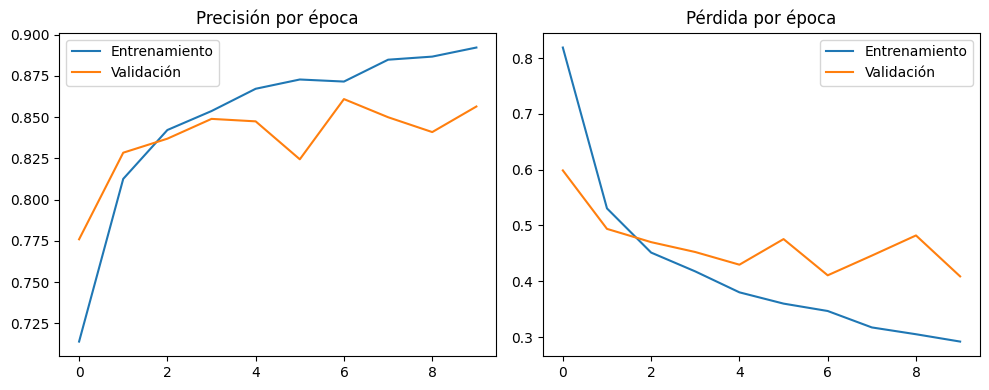

In [4]:
# 5. Seleccionar el mejor modelo
mejor_modelo, mejor_acc, mejor_ecm, mejores_parametros, mejor_history = sorted(resultados, key=lambda x: (-x[1], x[2]))[0]
print(f"\nMejor modelo: {mejores_parametros}, Accuracy: {mejor_acc:.4f}, ECM: {mejor_ecm:.4f}")

# 6. Guardar pesos y bias
pesos_bias = mejor_modelo.get_weights()
joblib.dump(pesos_bias, 'pesos_bias_mejor_modelo.pkl')

# 7. Gráficas de desempeño
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(mejor_history.history['accuracy'], label='Entrenamiento')
plt.plot(mejor_history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mejor_history.history['loss'], label='Entrenamiento')
plt.plot(mejor_history.history['val_loss'], label='Validación')
plt.title('Pérdida por época')
plt.legend()

plt.tight_layout()
plt.savefig('grafico_desempeno.png')



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.54      0.66       192
           1       0.99      0.95      0.97       192
           2       0.73      0.85      0.79       212
           3       0.85      0.91      0.88       205
           4       0.83      0.76      0.80       204
           5       0.93      0.96      0.95       193
           6       0.56      0.69      0.62       200
           7       0.90      0.92      0.91       206
           8       0.94      0.96      0.95       196
           9       0.95      0.90      0.92       200

    accuracy                           0.84      2000
   macro avg       0.86      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



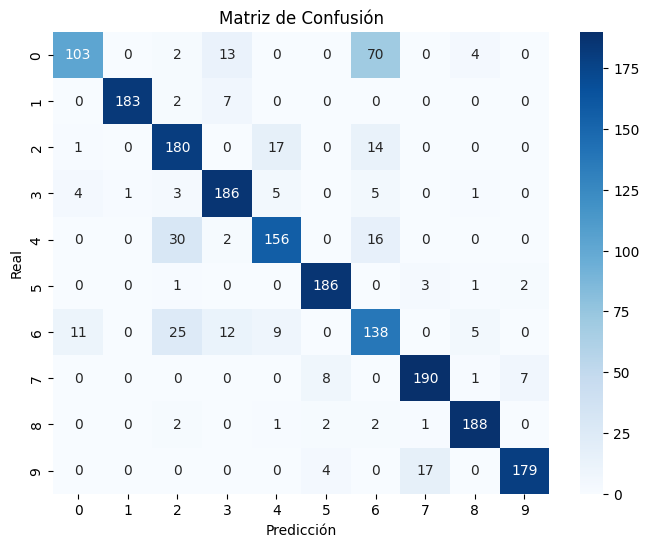

In [5]:
# 8. Matriz de confusión
plt.figure(figsize=(8,6))
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.savefig('matriz_confusion.png')

# 9. Clasificación detallada
print("\nReporte de clasificación:")
print(classification_report(y_val, y_pred))
